 **AIML CAPSTONE PROJECT CHATBOT MILESTONE - 1**


**1.Importing the Packages**

In [ ]:
pip install nbconvert

In [ ]:
!jupyter nbconvert --to html MergedCapstoneV2.ipynb

[NbConvertApp] Converting notebook MergedCapstoneV2.ipynb to html
[NbConvertApp] Writing 1883715 bytes to MergedCapstoneV2.html


In [ ]:
import plotly
print(plotly.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')

from wordcloud import WordCloud, STOPWORDS

random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

4.4.1


**2.Loading the Dataset**

In [ ]:
#Connecting to google drive
#from google.colab import drive
#drive.mount("/content/gdrive",force_remount=False)

In [ ]:
# OUR DATA FRAME
df= pd.read_csv("/content/Data Set - industrial_safety_and_health_database_with_accidents_description.csv")
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
df.shape

(425, 11)

In [ ]:
Text_bfore_pp=df.Description[10]

In [ ]:
#Renaming Column Names to Appropiate Names
df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


**3. Data Cleaning & Prepartion**

In [ ]:
#Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [ ]:
#Checking for anomolies
columns = df[df.columns[~df.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{df[cols].unique()}\nUnique count per label is:\n{df[cols].value_counts()}\n')

Unique values for Date is 
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 

In [ ]:
#Adjusting the Categorical Values
replace_values = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
df['Local'] = df['Local'].map(replace_values)
replace_values = {'I': 0, 'II': 1, 'III': 2, 'IV': 4, 'V': 5}
df['Accident Level'] = df['Accident Level'].map(replace_values)
replace_values = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
df['Potential Accident Level'] = df['Potential Accident Level'].map(replace_values)
del replace_values

In [ ]:
print(f'Dataset after adjusting categorical values\n')
df.head()

Dataset after adjusting categorical values



,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
#Checking for Null Values
df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
#Size of Data
df.shape

(425, 10)

**Processing the data for EDA Visualisations**

Accidents happen throughout the year added datetime features such as year, month and day.

In [ ]:
#Seperating components fo Date-Time
def func1():
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df['Date'].apply(lambda x : x.year)
  df['Month'] = df['Date'].apply(lambda x : x.month)
  df['Day'] = df['Date'].apply(lambda x : x.day)
  df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
  df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)

func1()
df.head(5)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


In [ ]:
#Dividing the year in quater
def month_quarter_Conversion(x):
    if x in [10, 11, 12]:
        season = 'Fourth'
    elif x in [1, 2, 3]:
        season = 'First'
    elif x in [4, 5, 6]:
        season = 'Second'
    elif x in [7, 8, 9]:
        season = 'Third'
    return season
df['Quarter'] = df['Month'].apply(month_quarter_Conversion)

df.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Quarter
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,First
1,2016-01-02,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,First
2,2016-01-06,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,First
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,First
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,First



 **4. UNIVARIATE ANALYSIS**

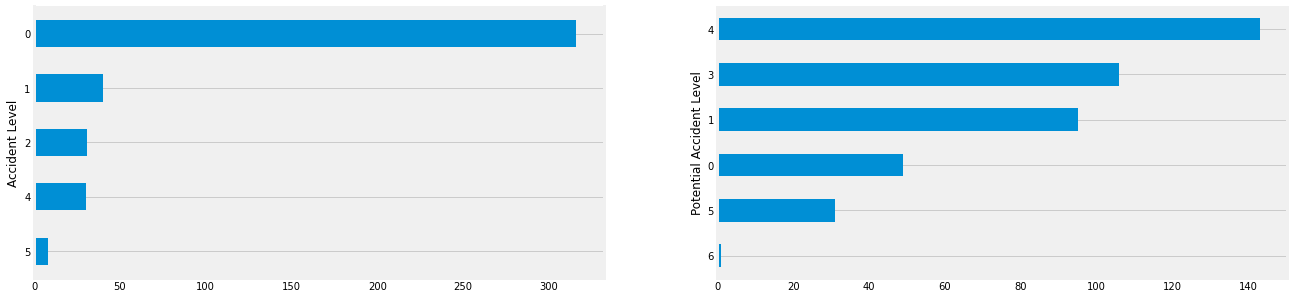

In [ ]:
#Frequency of occurance: Accident Levels & Potential Accident Levels
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
df[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
df[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')

In [ ]:
#The Country that is most effected
fig = px.pie(df, names='Country', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()


From the Pie chart above we see that country 1 is most affected with accendents


In [ ]:
# Contribution of Affected sector
fig = px.pie(df, names='Industry Sector', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Mining turns out to be the most affefcted sector

In [ ]:
#Mostly affected Employee type
fig = px.pie(df, names='Employee type', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()


Third party is the most affected with accidents

In [ ]:
#Mostly Affected Quater of Year
fig = px.pie(df, names='Quarter', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

First quater turns out to be most accident prone.

In [ ]:
#Mostly affected local Area
fig = px.pie(df, names='Local', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

**5. MULTI VARIANTE ANALYSIS**

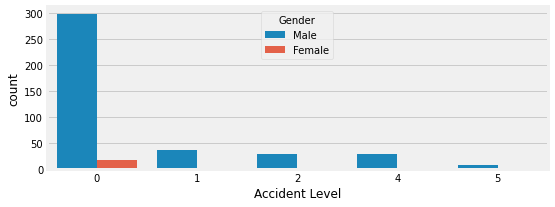

In [ ]:
#Analysis of Gender with Accident Level
fig = plt.figure(figsize = (8, 3))
sns.countplot(x = "Accident Level", data = df, hue = 'Gender')


Looking at the graph above Males are more prone to accidents than Females

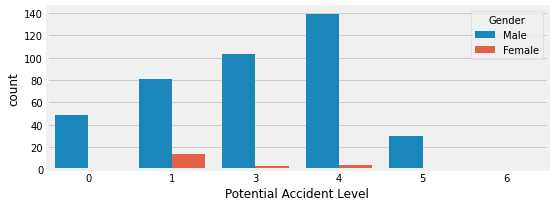

In [ ]:
#Analysis of Gender with Accident/ Potential Accident Level
fig = plt.figure(figsize = (8, 3))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Gender')


Again Males are more prone to potential accedents than Females


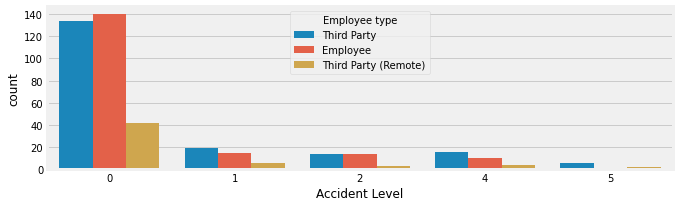

In [ ]:
#Analysis of Employee type wrt Accident Level
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = df, hue = 'Employee type')

From the above graph Third Party are more prone to Accidents

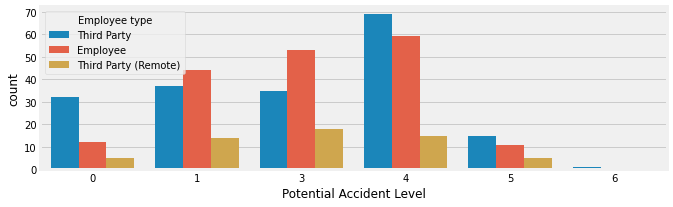

In [ ]:
#Analysis of Employee type wrt Potential Accident Level
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Employee type')


Again from the above graph Third Party are at greater risk


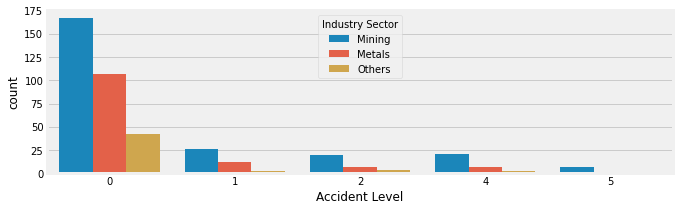

In [ ]:
#Analysis of Industry Sector wrt Accident Level
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = df, hue = 'Industry Sector')



We can clearly say that most of the accidents was due to Mining, it is because the probablity of mining jobs were heighest

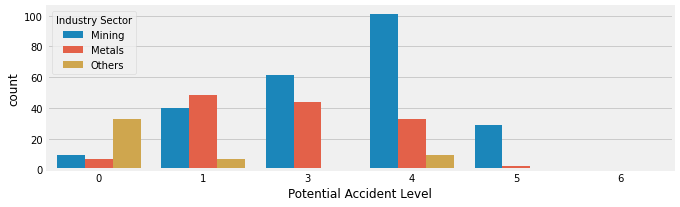

In [ ]:
#Analysis of Industry Sector wrt Potential Accident Level
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Industry Sector')


Also for potential accident level We can clearly say that most of the accidents was due to Mining

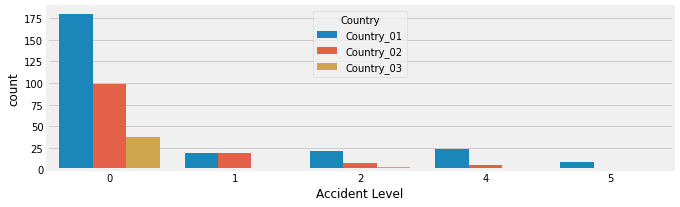

In [ ]:
#Analysis of Country wrt Accident Level
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = df, hue = 'Country')


It is obsereved that country_01 has more accidents compared to others.

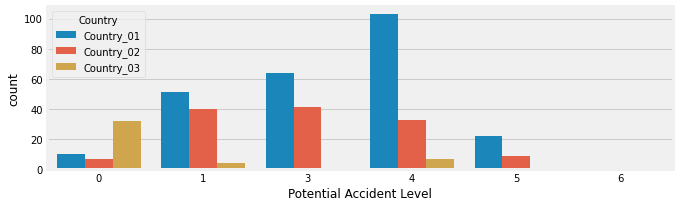

In [ ]:
#Analysis of Country wrt Potential Accident Level
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Country')


In the above graph we find that Country 1 has more potential accidents


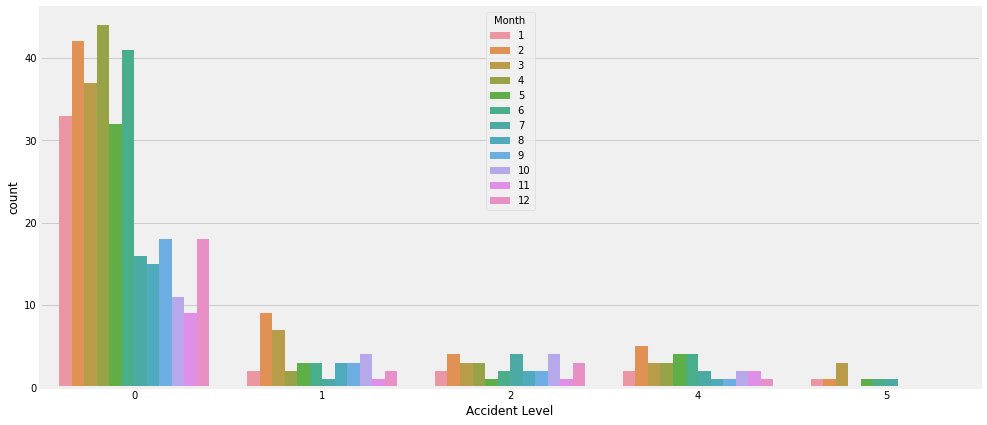

In [ ]:
#Analysis of Month wrt Accident Accident Level
fig = plt.figure(figsize = (15, 7))
sns.countplot(x = "Accident Level", data = df, hue = 'Month')

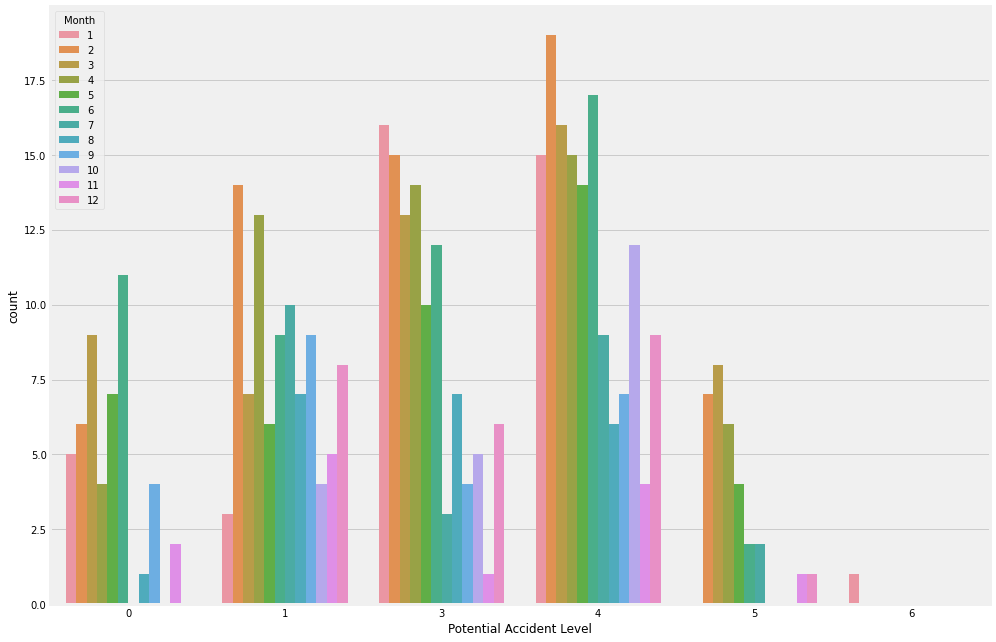

In [ ]:
#Analysis of Month wrt Potential Accident Level
fig = plt.figure(figsize = (15, 11))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Month')

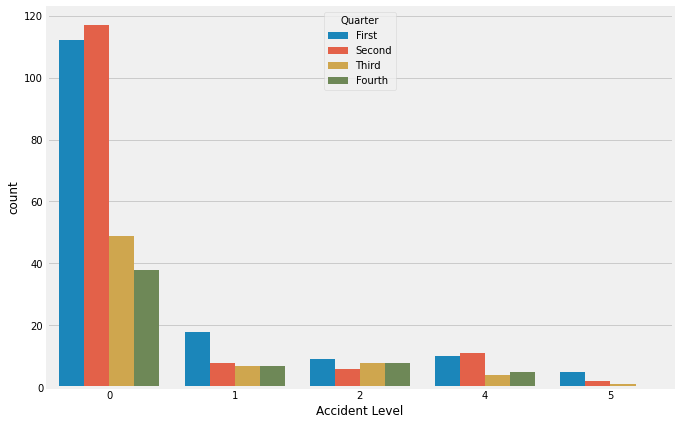

In [ ]:
#Analysis of Quarter wrt Accident Accident Level
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = df, hue = 'Quarter')

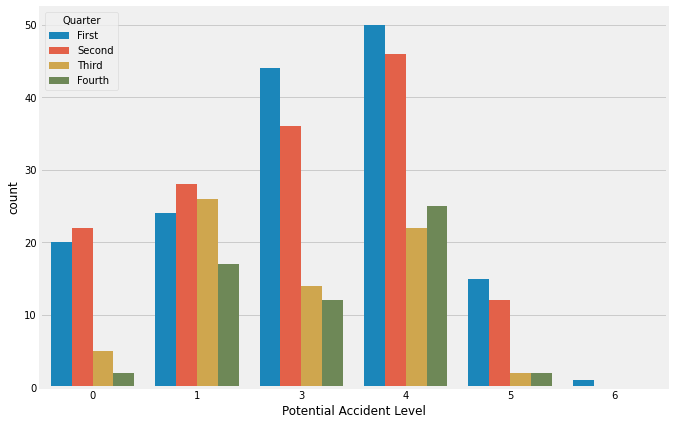

In [ ]:
#Analysis of Quarter wrt Potential Accident Level
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Quarter')

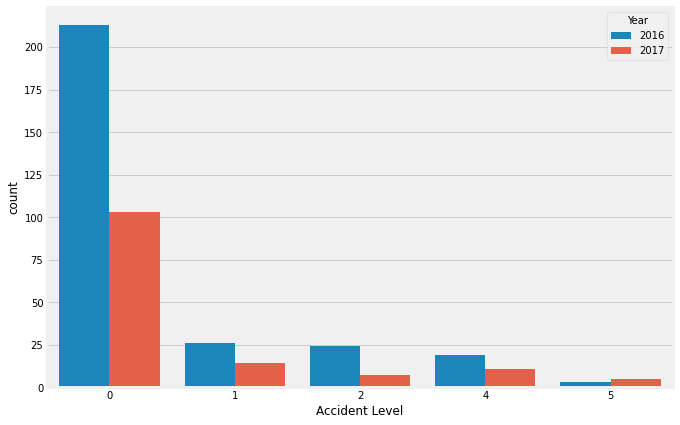

In [ ]:
#Analysis of Year wrt Accident Accident Level
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = df, hue = 'Year')

It is observed that 2016 has more number of accidents compared to 2017.

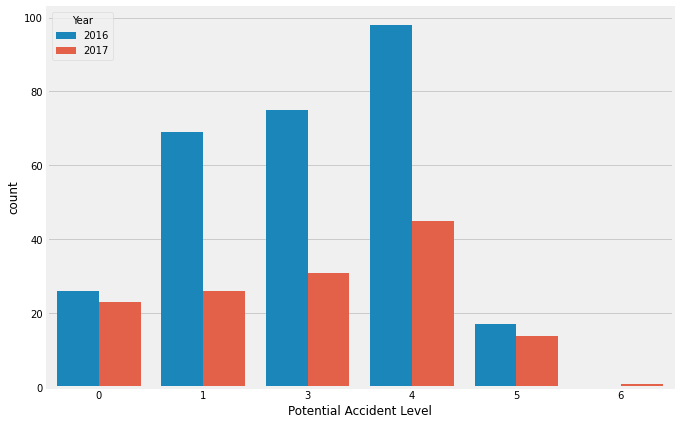

In [ ]:
#Analysis of Year wrt Potential Accident Level
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Year')

Same is the case with Potential accident level

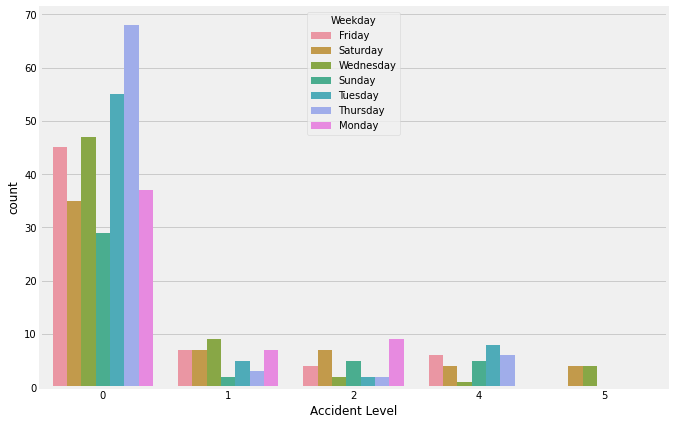

In [ ]:
#Analysis of Weekday wrt Accident Accident Level
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = df, hue = 'Weekday')

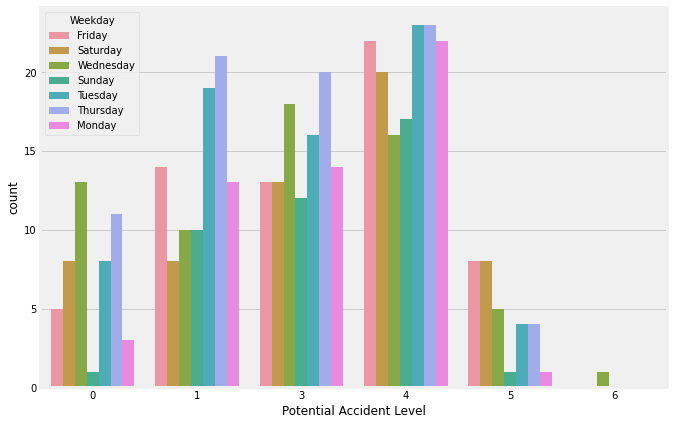

In [ ]:
#Analysis of Weekday wrt Potential Accident Level
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = df, hue = 'Weekday')

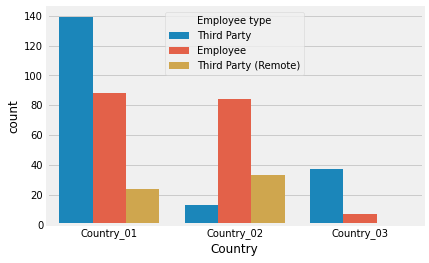

In [ ]:
#Analyze Country and Employee Type
sns.countplot(x="Country", data=df, hue="Employee type")

Country which is more prone to Accidents Third Party and Employee are most affected as compared to Country 2 and country3

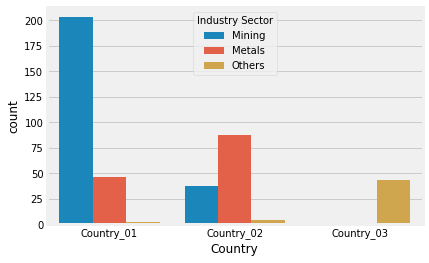

In [ ]:
#Analyze Country and Industry Sector
sns.countplot(x="Country", data=df, hue="Industry Sector")

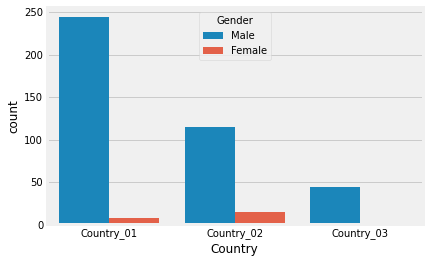

In [ ]:
#Analyze Country and Gender
sns.countplot(x="Country", data=df,hue="Gender")

In all the three countries Males are most affected

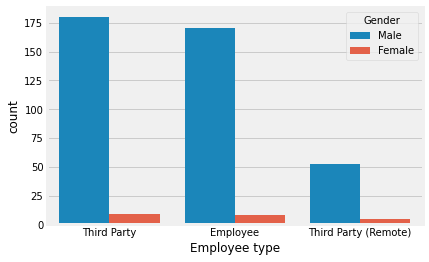

In [ ]:
#Analyze Employee Type and Gender
sns.countplot(x="Employee type", data=df,hue="Gender")

As per the above graph male in all the three employee type Male are more affected. But it is expected as female participation is very less compared to male participation rate in the first place

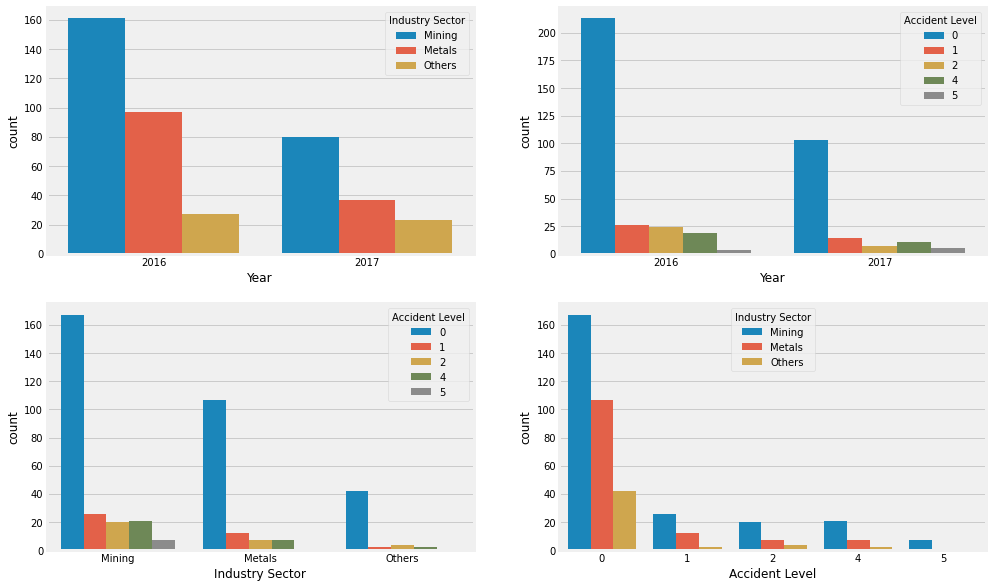

In [ ]:
#Analysing Year or Occurance Vs Accident level
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=df['Year'],hue='Industry Sector',data=df,ax=axs[0][0])
sns.countplot(x=df['Year'],hue='Accident Level',data=df,ax=axs[0][1])
sns.countplot(x=df['Industry Sector'],hue='Accident Level',data=df,ax=axs[1][0])
sns.countplot(x=df['Accident Level'],hue='Industry Sector',data=df,ax=axs[1][1])

*   Total No. of accidents seem to be decreasing, dropping almost by half from 2016 to 2017.
*   Mining Industry is the biggest contributor to accident occurance count, followed by Metals.
*   No. of accidents seems to decrease as Accident level increses.
*   Accident Level 1 occurances may have high frequency as their total count is multiple times other accident levels.
*   Accident Level 2 occurances are not recoreded at all. It may be an error.










**6. Analyzing text statistics**

 

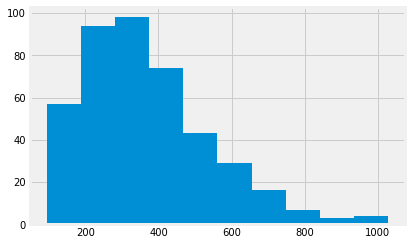

In [ ]:
# Number of characters present in each sentence
df['Description'].str.len().hist()

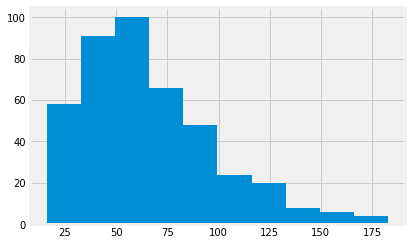

In [ ]:
#Number of words appearing in each description
df['Description'].str.split().map(lambda x: len(x)).hist()

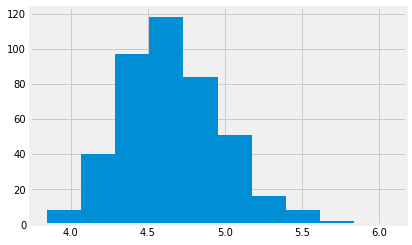

In [ ]:
#Average word length
df['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


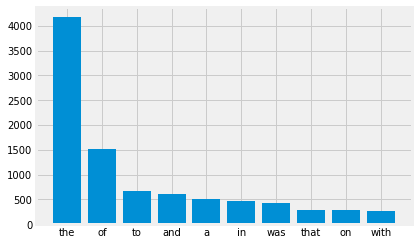

In [ ]:
#Stop word analysis
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def plot_top_stopwords_barchart(text):
    
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(df['Description'])

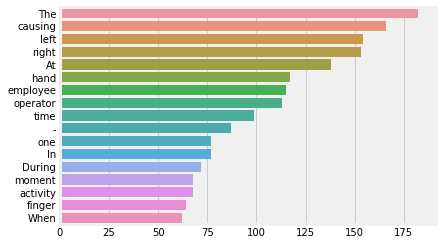

In [ ]:
#Top non-stop words plot
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['Description'])

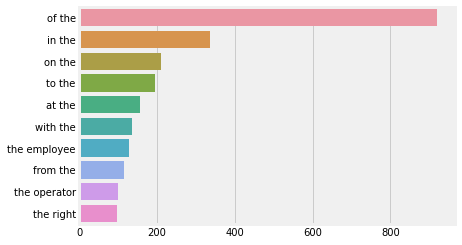

In [ ]:
#Analyzing N-Grams
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(df['Description'],2)

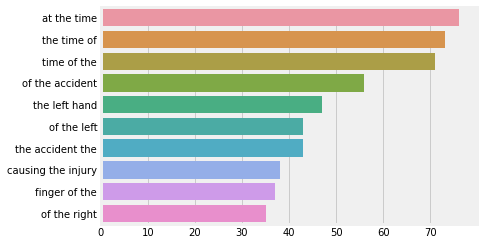

In [ ]:
plot_top_ngrams_barchart(df['Description'],3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


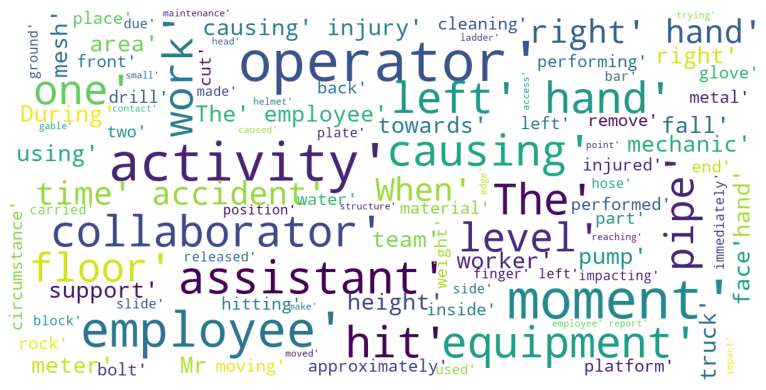

In [ ]:
#Word Cloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
   
plot_wordcloud(df['Description'])

**7. Pre-Processing Data Columns relevant to Model**

In [ ]:
# Creating dataframe with columns relevant to Model
df = df[['Accident Level','Potential Accident Level', 'Description']]

In [ ]:
# Subset dataframe shape
df.shape

(425, 3)

In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
df.Description = df.Description.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(Text_bfore_pp)
print(df.Description[10])

While installing a segment of the polyurethane pulley protective lyner - 60x4x5cm weighing 1.2 kg - on the head pulley of the ore winch, when the pulley is rotated to compress the lyner inside the channel, it falls from its housing 1.50 m rubbing the right side of the worker's hip, generating the injury described.
While installing segment polyurethane pulley protective lyner - 60x4x5cm weighing 1.2 kg - head pulley ore winch, pulley rotated compress lyner inside channel, falls housing 1.50 rubbing right side worker's hip, generating injury described.


In [ ]:
#Checking for Duplicates
print(df[df.duplicated()])

     Accident Level  ...                                        Description
38                0  ...  When starting activity removing coil electric ...
77                0  ...  In circumstances two workers Abratech company ...
131               0  ...  In geological reconnaissance activity, farm Mr...
144               0  ...  Project Vazante carried sediment collection cu...
262               0  ...  During activity chuteo ore hopper OP5; operato...
263               0  ...  During activity chuteo ore hopper OP5; operato...
303               0  ...  Employees engaged removal material excavation ...
345               0  ...  On 02/03/17 soil sampling region Sta. employee...
346               0  ...  On 02/03/17 soil sampling region Sta. employee...
355               0  ...  Team VMS Project performed soil collection Xix...
397               0  ...  In moments 02 collaborators carried inspection...
413               0  ...  In circumstance, AHK-903 license plate (Empres...

[12 rows x 

In [ ]:
#Removing Duplicates
df = df.drop_duplicates(ignore_index= True)

In [ ]:
print(df.duplicated().value_counts())

False    413
dtype: int64


In [ ]:
df

,Accident Level,Potential Accident Level,Description
0,0,4,"While removing drill rod Jumbo 08 maintenance,..."
1,0,4,"During activation sodium sulphide pump, piping..."
2,0,3,In sub-station MILPO located level +170 collab...
3,0,0,Being 9:45 am. approximately Nv. 1880 CX-695 O...
4,4,4,Approximately 11:45 a.m. circumstances mechani...
...,...,...,...
408,0,3,"Being approximately 5:00 a.m. approximately, l..."
409,0,1,The collaborator moved infrastructure office (...
410,0,1,"During environmental monitoring activity area,..."
411,0,1,The Employee performed activity stripping cath...


**8. Pre-Processing text for Model Building**

In [ ]:
#Converting text to lower case
df['Description_lower'] = df['Description'].str.lower()

In [ ]:
#Removing all special character and alphabets
import re
df['Description_clear'] = df['Description_lower'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x)) 

In [ ]:
df

,Accident Level,Potential Accident Level,Description,Description_lower,Description_clear
0,0,4,"While removing drill rod Jumbo 08 maintenance,...","while removing drill rod jumbo 08 maintenance,...",while removing drill rod jumbo maintenance sup...
1,0,4,"During activation sodium sulphide pump, piping...","during activation sodium sulphide pump, piping...",during activation sodium sulphide pump piping ...
2,0,3,In sub-station MILPO located level +170 collab...,in sub-station milpo located level +170 collab...,in sub station milpo located level collaborato...
3,0,0,Being 9:45 am. approximately Nv. 1880 CX-695 O...,being 9:45 am. approximately nv. 1880 cx-695 o...,being am approximately nv cx ob personnel begi...
4,4,4,Approximately 11:45 a.m. circumstances mechani...,approximately 11:45 a.m. circumstances mechani...,approximately a m circumstances mechanics anth...
...,...,...,...,...,...
408,0,3,"Being approximately 5:00 a.m. approximately, l...","being approximately 5:00 a.m. approximately, l...",being approximately a m approximately lifting ...
409,0,1,The collaborator moved infrastructure office (...,the collaborator moved infrastructure office (...,the collaborator moved infrastructure office j...
410,0,1,"During environmental monitoring activity area,...","during environmental monitoring activity area,...",during environmental monitoring activity area ...
411,0,1,The Employee performed activity stripping cath...,the employee performed activity stripping cath...,the employee performed activity stripping cath...


In [ ]:
df['Description'][3]

'Being 9:45 am. approximately Nv. 1880 CX-695 OB7, personnel begins task unlocking Soquet bolts BHB machine, penultimate bolt identified hexagonal head worn, proceeding Mr. Cristóbal - Auxiliary assistant climb platform exert pressure hand "DADO" key, prevent coming bolt; moments two collaborators rotate lever anti-clockwise direction, leaving key bolt, hitting palm left hand, causing injury.'

In [ ]:
df['Description_clear'][3]

'being am approximately nv cx ob personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury '

In [ ]:
#Removing suffixes of time, weight and dimension
stopwords=[ "am","pm","mr","cm","kg","m","x"]

In [ ]:
#Function to remove custom stopwords
def remove_stopwords(sentence):
  for word in stopwords:
    token=' '+word+' '
    sentence=sentence.replace(token,' ')
    sentence=sentence.replace('  ',' ')
  return sentence

In [ ]:
df['Description_clean'] = df['Description_clear'].apply(lambda i: remove_stopwords(i))

In [ ]:
df['Description_clear'][3]

'being am approximately nv cx ob personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury '

In [ ]:
df['Description_clean'][3]

'being approximately nv cx ob personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury '

In [ ]:
#Tokenisation & Lemmatization of text
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Tokenisation of text
from nltk.tokenize import word_tokenize
df['Description_tok'] = df['Description_clean'].apply(lambda i: word_tokenize(i))

In [ ]:
#Lemmatisation of verbs in text 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = [wordnet_lemmatizer.lemmatize(i, pos="v") for i in text]
    return lem_text

In [ ]:
df['Description_lemm'] = df['Description_tok'].apply(lambda i: word_lemmatizer(i))

In [ ]:
#Lemmatisation of nouns in text
def word_lemmatizer2(text):
    lem_text2 = [wordnet_lemmatizer.lemmatize(i, pos="n") for i in text]
    return lem_text2

In [ ]:
df['Description_lemm2'] = df['Description_lemm'].apply(lambda i: word_lemmatizer2(i))

In [ ]:
df

,Accident Level,Potential Accident Level,Description,Description_lower,Description_clear,Description_clean,Description_tok,Description_lemm,Description_lemm2
0,0,4,"While removing drill rod Jumbo 08 maintenance,...","while removing drill rod jumbo 08 maintenance,...",while removing drill rod jumbo maintenance sup...,while removing drill rod jumbo maintenance sup...,"[while, removing, drill, rod, jumbo, maintenan...","[while, remove, drill, rod, jumbo, maintenance...","[while, remove, drill, rod, jumbo, maintenance..."
1,0,4,"During activation sodium sulphide pump, piping...","during activation sodium sulphide pump, piping...",during activation sodium sulphide pump piping ...,during activation sodium sulphide pump piping ...,"[during, activation, sodium, sulphide, pump, p...","[during, activation, sodium, sulphide, pump, p...","[during, activation, sodium, sulphide, pump, p..."
2,0,3,In sub-station MILPO located level +170 collab...,in sub-station milpo located level +170 collab...,in sub station milpo located level collaborato...,in sub station milpo located level collaborato...,"[in, sub, station, milpo, located, level, coll...","[in, sub, station, milpo, locate, level, colla...","[in, sub, station, milpo, locate, level, colla..."
3,0,0,Being 9:45 am. approximately Nv. 1880 CX-695 O...,being 9:45 am. approximately nv. 1880 cx-695 o...,being am approximately nv cx ob personnel begi...,being approximately nv cx ob personnel begins ...,"[being, approximately, nv, cx, ob, personnel, ...","[be, approximately, nv, cx, ob, personnel, beg...","[be, approximately, nv, cx, ob, personnel, beg..."
4,4,4,Approximately 11:45 a.m. circumstances mechani...,approximately 11:45 a.m. circumstances mechani...,approximately a m circumstances mechanics anth...,approximately a circumstances mechanics anthon...,"[approximately, a, circumstances, mechanics, a...","[approximately, a, circumstances, mechanics, a...","[approximately, a, circumstance, mechanic, ant..."
...,...,...,...,...,...,...,...,...,...
408,0,3,"Being approximately 5:00 a.m. approximately, l...","being approximately 5:00 a.m. approximately, l...",being approximately a m approximately lifting ...,being approximately a approximately lifting ke...,"[being, approximately, a, approximately, lifti...","[be, approximately, a, approximately, lift, ke...","[be, approximately, a, approximately, lift, ke..."
409,0,1,The collaborator moved infrastructure office (...,the collaborator moved infrastructure office (...,the collaborator moved infrastructure office j...,the collaborator moved infrastructure office j...,"[the, collaborator, moved, infrastructure, off...","[the, collaborator, move, infrastructure, offi...","[the, collaborator, move, infrastructure, offi..."
410,0,1,"During environmental monitoring activity area,...","during environmental monitoring activity area,...",during environmental monitoring activity area ...,during environmental monitoring activity area ...,"[during, environmental, monitoring, activity, ...","[during, environmental, monitor, activity, are...","[during, environmental, monitor, activity, are..."
411,0,1,The Employee performed activity stripping cath...,the employee performed activity stripping cath...,the employee performed activity stripping cath...,the employee performed activity stripping cath...,"[the, employee, performed, activity, stripping...","[the, employee, perform, activity, strip, cath...","[the, employee, perform, activity, strip, cath..."


In [ ]:
df['Description_clean'][3]

'being approximately nv cx ob personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury '

In [ ]:
df['Description_tok'][3]

['being',
 'approximately',
 'nv',
 'cx',
 'ob',
 'personnel',
 'begins',
 'task',
 'unlocking',
 'soquet',
 'bolts',
 'bhb',
 'machine',
 'penultimate',
 'bolt',
 'identified',
 'hexagonal',
 'head',
 'worn',
 'proceeding',
 'crist',
 'bal',
 'auxiliary',
 'assistant',
 'climb',
 'platform',
 'exert',
 'pressure',
 'hand',
 'dado',
 'key',
 'prevent',
 'coming',
 'bolt',
 'moments',
 'two',
 'collaborators',
 'rotate',
 'lever',
 'anti',
 'clockwise',
 'direction',
 'leaving',
 'key',
 'bolt',
 'hitting',
 'palm',
 'left',
 'hand',
 'causing',
 'injury']

In [ ]:
df['Description_lemm'][3]

['be',
 'approximately',
 'nv',
 'cx',
 'ob',
 'personnel',
 'begin',
 'task',
 'unlock',
 'soquet',
 'bolt',
 'bhb',
 'machine',
 'penultimate',
 'bolt',
 'identify',
 'hexagonal',
 'head',
 'wear',
 'proceed',
 'crist',
 'bal',
 'auxiliary',
 'assistant',
 'climb',
 'platform',
 'exert',
 'pressure',
 'hand',
 'dado',
 'key',
 'prevent',
 'come',
 'bolt',
 'moments',
 'two',
 'collaborators',
 'rotate',
 'lever',
 'anti',
 'clockwise',
 'direction',
 'leave',
 'key',
 'bolt',
 'hit',
 'palm',
 'leave',
 'hand',
 'cause',
 'injury']

In [ ]:
df['Description_lemm2'][3]

['be',
 'approximately',
 'nv',
 'cx',
 'ob',
 'personnel',
 'begin',
 'task',
 'unlock',
 'soquet',
 'bolt',
 'bhb',
 'machine',
 'penultimate',
 'bolt',
 'identify',
 'hexagonal',
 'head',
 'wear',
 'proceed',
 'crist',
 'bal',
 'auxiliary',
 'assistant',
 'climb',
 'platform',
 'exert',
 'pressure',
 'hand',
 'dado',
 'key',
 'prevent',
 'come',
 'bolt',
 'moment',
 'two',
 'collaborator',
 'rotate',
 'lever',
 'anti',
 'clockwise',
 'direction',
 'leave',
 'key',
 'bolt',
 'hit',
 'palm',
 'leave',
 'hand',
 'cause',
 'injury']

In [ ]:
#Converting lemmatized back into strings, for some 
df['Description_str2'] = [' '.join(map(str, l)) for l in df['Description_lemm2']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Description_str2'], 30)

df2 = pd.DataFrame(common_words, columns = ['DescText' , 'count'])
print(df2)

        DescText  count
0          cause    190
1          leave    177
2           hand    176
3       employee    172
4          right    154
5       operator    129
6           time    112
7       activity    111
8         injury    110
9            use    104
10        moment     98
11           hit     97
12        worker     87
13          work     84
14  collaborator     81
15       perform     81
16        finger     76
17          area     76
18     equipment     75
19          fall     75
20     assistant     74
21      accident     73
22       support     70
23         level     70
24          pipe     67
25          make     66
26         floor     64
27           cut     62
28        remove     59
29          mesh     59


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Description_clear'], 30)

df3 = pd.DataFrame(common_words, columns = ['DescText' , 'count'])
print(df3)

             DescText  count
0           left hand     70
1          right hand     57
2       time accident     56
3      causing injury     51
4         finger left     22
5    employee reports     22
6    injury described     18
7      medical center     17
8    described injury     17
9               cm cm     17
10          left foot     15
11     injured person     15
12       hand causing     14
13       support mesh     14
14        injury time     14
15       finger right     13
16           da silva     13
17          right leg     11
18      safety gloves     11
19      fragment rock     10
20     wearing safety     10
21         time event     10
22  allergic reaction     10
23          weight kg      9
24         right foot      9
25          split set      9
26           left leg      9
27      middle finger      9
28      height meters      9
29        ring finger      9


In [ ]:
#Visualising POS tags of processed text

In [ ]:
pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
print(df['Description_str2'])

0      while remove drill rod jumbo maintenance super...
1      during activation sodium sulphide pump pip unc...
2      in sub station milpo locate level collaborator...
3      be approximately nv cx ob personnel begin task...
4      approximately a circumstance mechanic anthony ...
                             ...                        
408    be approximately a approximately lift kelly hq...
409    the collaborator move infrastructure office ju...
410    during environmental monitor activity area emp...
411    the employee perform activity strip cathode pu...
412    at a assistant clean floor module e central ca...
Name: Description_str2, Length: 413, dtype: object


In [ ]:
from gensim.corpora import Dictionary
# Collecting words
id2word = Dictionary(df['Description_tok'])
id2word.filter_extremes(no_below=5)
print("Number of unique words:", len(id2word.token2id.keys()), "\n")

Number of unique words: 640 



In [ ]:
#Tagging & Preparing data for Visualisation
from textblob import TextBlob
b = list(id2word.token2id.keys())
blob = TextBlob(str(b))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.loc[pos_df['pos'] != 'POS']
pos_df = pos_df.pos.value_counts()[:20]


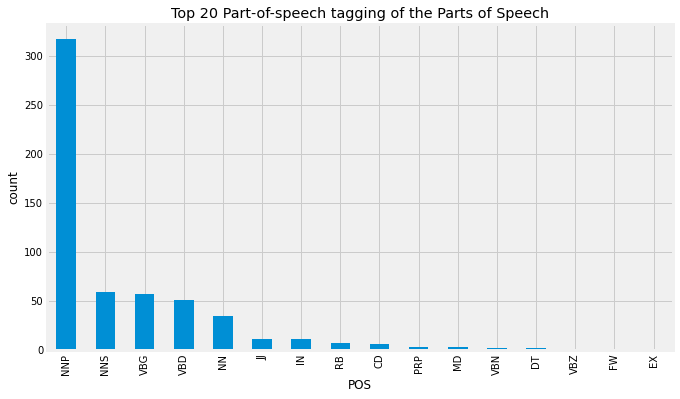

In [ ]:
#Plotting the graph
pos_df.plot(kind='bar',
        xlabel='POS',
        ylabel='count', 
        title='Top 20 Part-of-speech tagging of the Parts of Speech',
        figsize=(10, 6))

**9.  Model Building**

**9.1.1 Basic ML Models Using TF-IDF**

In [ ]:
%tensorflow_version 2.x
import tensorflow
import random
random.seed(0)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
#Processing text to input in the ML model
X=df["Description_lemm2"].copy()

In [ ]:
X

0      [while, remove, drill, rod, jumbo, maintenance...
1      [during, activation, sodium, sulphide, pump, p...
2      [in, sub, station, milpo, locate, level, colla...
3      [be, approximately, nv, cx, ob, personnel, beg...
4      [approximately, a, circumstance, mechanic, ant...
                             ...                        
408    [be, approximately, a, approximately, lift, ke...
409    [the, collaborator, move, infrastructure, offi...
410    [during, environmental, monitor, activity, are...
411    [the, employee, perform, activity, strip, cath...
412    [at, a, assistant, clean, floor, module, e, ce...
Name: Description_lemm2, Length: 413, dtype: object

In [ ]:
X.dropna()

0      [while, remove, drill, rod, jumbo, maintenance...
1      [during, activation, sodium, sulphide, pump, p...
2      [in, sub, station, milpo, locate, level, colla...
3      [be, approximately, nv, cx, ob, personnel, beg...
4      [approximately, a, circumstance, mechanic, ant...
                             ...                        
408    [be, approximately, a, approximately, lift, ke...
409    [the, collaborator, move, infrastructure, offi...
410    [during, environmental, monitor, activity, are...
411    [the, employee, perform, activity, strip, cath...
412    [at, a, assistant, clean, floor, module, e, ce...
Name: Description_lemm2, Length: 413, dtype: object

In [ ]:
X.shape

(413,)

In [ ]:
X[3]

['be',
 'approximately',
 'nv',
 'cx',
 'ob',
 'personnel',
 'begin',
 'task',
 'unlock',
 'soquet',
 'bolt',
 'bhb',
 'machine',
 'penultimate',
 'bolt',
 'identify',
 'hexagonal',
 'head',
 'wear',
 'proceed',
 'crist',
 'bal',
 'auxiliary',
 'assistant',
 'climb',
 'platform',
 'exert',
 'pressure',
 'hand',
 'dado',
 'key',
 'prevent',
 'come',
 'bolt',
 'moment',
 'two',
 'collaborator',
 'rotate',
 'lever',
 'anti',
 'clockwise',
 'direction',
 'leave',
 'key',
 'bolt',
 'hit',
 'palm',
 'leave',
 'hand',
 'cause',
 'injury']

In [ ]:
for i in range(0,413):
  X[i]= ' '.join([str(elem) for elem in X[i]])
  #print(i)

In [ ]:
X

0      while remove drill rod jumbo maintenance super...
1      during activation sodium sulphide pump pip unc...
2      in sub station milpo locate level collaborator...
3      be approximately nv cx ob personnel begin task...
4      approximately a circumstance mechanic anthony ...
                             ...                        
408    be approximately a approximately lift kelly hq...
409    the collaborator move infrastructure office ju...
410    during environmental monitor activity area emp...
411    the employee perform activity strip cathode pu...
412    at a assistant clean floor module e central ca...
Name: Description_lemm2, Length: 413, dtype: object

In [ ]:
# Defining Target Variables // Coding for two target Variables
Y1=df["Accident Level"]
Y2=df["Potential Accident Level"]

In [ ]:
Y1

0      0
1      0
2      0
3      0
4      4
      ..
408    0
409    0
410    0
411    0
412    0
Name: Accident Level, Length: 413, dtype: int64

In [ ]:
#Splitting the data in training and test set
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1, test_size = 0.15, random_state = 0)

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2, test_size = 0.15, random_state = 0)

In [ ]:
X1_train

179    the employee partner company gr report cut wat...
124    be approximately workshop mechanical maintenan...
134    level ore haul activity locomotive op bin time...
186    in circumstance drill assistant proceed assemb...
49     the operator feed bag big bag contain scrap zn...
                             ...                        
323    by average office ajani liliana prepare store ...
192    the servant would remove dish bowl sink pick s...
117    when employee milpo lima visit facility level ...
47     on pit level radial drill perform negative hol...
172    the employee report drain ammonia use refriger...
Name: Description_lemm2, Length: 351, dtype: object

In [ ]:
#Defining NaiveBayes Model
from sklearn import naive_bayes
mlmodel1 = naive_bayes.GaussianNB()

In [ ]:
#Converting description strings to vectors using TF-IDF encoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_tfidf=Tfidf_vect.fit_transform(X1_train)
Train_X_Tfidf = Tfidf_vect.transform(X1_train)
Test_X_Tfidf = Tfidf_vect.transform(X1_test)

In [ ]:
Train_X_Tfidf

<351x2204 sparse matrix of type '<class 'numpy.float64'>'
	with 10502 stored elements in Compressed Sparse Row format>

In [ ]:
#Training the Naive Bayes model for Accident Level
mlmodel1.fit(Train_X_Tfidf.toarray(),Y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Testing the trained NB Model
test_pred=mlmodel1.predict(Test_X_Tfidf.toarray())

In [ ]:
#Checking accuracy of NB classifier 
from sklearn.metrics import accuracy_score
accuracy_score(Y1_test, test_pred)*100

69.35483870967742

In [ ]:
# Model Analysis with Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# confusion matrix
matrix = confusion_matrix(Y1_test, test_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[43  0  0  1  0]
 [ 8  0  0  0  0]
 [ 5  0  0  0  0]
 [ 3  0  0  0  0]
 [ 2  0  0  0  0]]


In [ ]:
len(Y1_test)

62

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y1_test, test_pred, target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']))


Classification Report

              precision    recall  f1-score   support

     Level 1       0.70      0.98      0.82        44
     Level 2       0.00      0.00      0.00         8
     Level 3       0.00      0.00      0.00         5
     Level 4       0.00      0.00      0.00         3
     Level 5       0.00      0.00      0.00         2

    accuracy                           0.69        62
   macro avg       0.14      0.20      0.16        62
weighted avg       0.50      0.69      0.58        62



In [ ]:
#Defining NB Model
mlmodel2 = naive_bayes.GaussianNB()

In [ ]:
#Converting description strings to vectors using TF-IDF encoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
X2_train_tfidf=Tfidf_vect.fit_transform(X2_train)
Train_X2_Tfidf = Tfidf_vect.transform(X2_train)
Test_X2_Tfidf = Tfidf_vect.transform(X2_test)

In [ ]:
Test_X2_Tfidf

<62x2204 sparse matrix of type '<class 'numpy.float64'>'
	with 1684 stored elements in Compressed Sparse Row format>

In [ ]:
#Training the Naive Bayes model for Potential Accident Level
mlmodel2.fit(Train_X2_Tfidf.toarray(),Y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Testing the trained NB Model
test_pred2=mlmodel2.predict(Test_X2_Tfidf.toarray())

In [ ]:
#Checking accuracy of NB classifier
accuracy_score(Y2_test, test_pred2)*100

38.70967741935484

In [ ]:
# confusion matrix
matrix = confusion_matrix(Y2_test, test_pred2)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 2  1  2  1  1]
 [ 1  3  0  7  0]
 [ 0  2  5  7  0]
 [ 0  3  7 14  0]
 [ 0  1  1  4  0]]


In [ ]:
len(Y2_test)

62

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y2_test, test_pred2, target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']))


Classification Report

              precision    recall  f1-score   support

     Level 1       0.67      0.29      0.40         7
     Level 2       0.30      0.27      0.29        11
     Level 3       0.33      0.36      0.34        14
     Level 4       0.42      0.58      0.49        24
     Level 5       0.00      0.00      0.00         6

    accuracy                           0.39        62
   macro avg       0.34      0.30      0.30        62
weighted avg       0.37      0.39      0.36        62



In [ ]:
#SVM models for the two target variables
from sklearn import svm
#Defining the SVM Model
SVM1 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

#Training the model for Accident Level
SVM1.fit(Train_X_Tfidf,Y1_train)

#Testing the model
predictions_SVM1 = SVM1.predict(Test_X_Tfidf)

#Checking Accuracy of model
accuracy_score(Y1_test, predictions_SVM1)*100

70.96774193548387

In [ ]:
# confusion matrix
matrix = confusion_matrix(Y1_test, predictions_SVM1)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[44  0  0  0  0]
 [ 8  0  0  0  0]
 [ 5  0  0  0  0]
 [ 3  0  0  0  0]
 [ 2  0  0  0  0]]


In [ ]:
len(Y1_test)

62

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y1_test, predictions_SVM1, target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']))


Classification Report

              precision    recall  f1-score   support

     Level 1       0.71      1.00      0.83        44
     Level 2       0.00      0.00      0.00         8
     Level 3       0.00      0.00      0.00         5
     Level 4       0.00      0.00      0.00         3
     Level 5       0.00      0.00      0.00         2

    accuracy                           0.71        62
   macro avg       0.14      0.20      0.17        62
weighted avg       0.50      0.71      0.59        62



In [ ]:
#Defining the SVM Model
SVM2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

#Training the model for Potential Accident Level
SVM2.fit(Train_X2_Tfidf,Y2_train)

#Testing the model
predictions_SVM2 = SVM2.predict(Test_X2_Tfidf)

#Checking Accuracy of model
accuracy_score(Y2_test, predictions_SVM2)*100

41.935483870967744

In [ ]:
# confusion matrix
matrix = confusion_matrix(Y2_test, predictions_SVM2)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 2  2  2  1  0]
 [ 1  3  4  3  0]
 [ 0  1  7  6  0]
 [ 0  3  7 14  0]
 [ 0  0  1  5  0]]


In [ ]:
len(Y2_test)

62

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y2_test, predictions_SVM2, target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']))


Classification Report

              precision    recall  f1-score   support

     Level 1       0.67      0.29      0.40         7
     Level 2       0.33      0.27      0.30        11
     Level 3       0.33      0.50      0.40        14
     Level 4       0.48      0.58      0.53        24
     Level 5       0.00      0.00      0.00         6

    accuracy                           0.42        62
   macro avg       0.36      0.33      0.33        62
weighted avg       0.40      0.42      0.39        62



**9.1.2 Basic ML Models Using word2Vec Encoder**

In [ ]:
#Data Preparation for word2vec Encoding
df.columns

Index(['Accident Level', 'Potential Accident Level', 'Description',
       'Description_lower', 'Description_clear', 'Description_clean',
       'Description_tok', 'Description_lemm', 'Description_lemm2',
       'Description_str2'],
      dtype='object')

In [ ]:
#Convert target to category
df['Accident Level'].astype('category')

0      0
1      0
2      0
3      0
4      4
      ..
408    0
409    0
410    0
411    0
412    0
Name: Accident Level, Length: 413, dtype: category
Categories (5, int64): [0, 1, 2, 4, 5]

In [ ]:
#Processing text to input in the models
target_column = 'Accident Level'
df['target']=df[target_column]

In [ ]:
df = df[['target', 'Description']]

In [ ]:
#Finding Description of Max length 
def find_max_list_idx(list):
    list_len = [len(i) for i in list]
    return np.argmax(np.array(list_len))
    
max_idx = find_max_list_idx(df['Description'])
print(max_idx)

170


In [ ]:
MAX_SEQUENCE_LENGTH = len(df['Description'][max_idx])
print(len(df['Description'][max_idx]))

722


In [ ]:
desc_lines = list()
lines = df['Description'].values.tolist()

In [ ]:
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm

In [ ]:
for line in lines:   
    tokens = word_tokenize(line)
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    desc_lines.append(words)

In [ ]:
len(desc_lines)

413

In [ ]:
df['Description'][1]

'During activation sodium sulphide pump, piping uncoupled sulfide solution designed area reach maid. Immediately made use emergency shower directed ambulatory doctor later hospital. Note: sulphide solution = 48 grams / liter.'

In [ ]:
desc_lines[1]

['During',
 'activation',
 'sodium',
 'sulphide',
 'pump',
 'piping',
 'uncoupled',
 'sulfide',
 'solution',
 'designed',
 'area',
 'reach',
 'maid',
 'Immediately',
 'made',
 'use',
 'emergency',
 'shower',
 'directed',
 'ambulatory',
 'doctor',
 'later',
 'hospital',
 'Note',
 'sulphide',
 'solution',
 'grams',
 'liter']

In [ ]:
import gensim 

EMBEDDING_DIM = 100
# train word2vec model
model = gensim.models.Word2Vec(sentences=desc_lines, size=EMBEDDING_DIM, window=5, workers=4, min_count=1)
# vocab size
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 3179


In [ ]:
# save model in ASCII (word2vec) format
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
words[10:15]

['intermediate', 'centralizer', 'facilitate', 'removal', 'seeing']

In [ ]:
model.wv.most_similar('removal')

[('operator', 0.6407933235168457),
 ('At', 0.6323094367980957),
 ('left', 0.6271770000457764),
 ('part', 0.6248384118080139),
 ('work', 0.6181550621986389),
 ('causing', 0.6161031126976013),
 ('truck', 0.6128698587417603),
 ('hand', 0.6108270883560181),
 ('Mr', 0.6106834411621094),
 ('moment', 0.6104662418365479)]

In [ ]:
import os
#Loding saved model
embeddings_index = {}
f = open(os.path.join('', 'embedding_word2vec.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [ ]:
# vectorize the text into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(desc_lines)
sequences = tokenizer_obj.texts_to_sequences(desc_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

desc_pad = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

X = desc_pad

print('Shape of Desc tensor:', X.shape)

Found 3025 unique tokens.
Shape of Desc tensor: (413, 722)


In [ ]:
y = pd.get_dummies(df['target']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (413, 5)


In [ ]:
pd.DataFrame(y).value_counts()

0  1  2  3  4
1  0  0  0  0    304
0  1  0  0  0     40
   0  1  0  0     31
      0  1  0     30
         0  1      8
dtype: int64

In [ ]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
#Splitting the data in training and testing set
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 1122, shuffle = True)

In [ ]:
print('##'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('##'*20, f'\nNumber of rows in test dataset: {x_val.shape[0]}')
print(f'Number of columns in test dataset: {x_val.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_val)))}')

######################################## 
Number of rows in training dataset: 371
Number of columns in training dataset: 722
Number of unique words in training dataset: 2860
######################################## 
Number of rows in test dataset: 42
Number of columns in test dataset: 722
Number of unique words in test dataset: 779


In [ ]:
!pip install imblearn
import imblearn

In [ ]:
#Balancing all categories of target variables
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=111, categorical_features=[0,1,2,3,4])
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
print('Before Sampling: X_train: {}, y_train: {}'.format(X.shape, y.shape))

Before Sampling: X_train: (413, 722), y_train: (413, 5)


In [ ]:
print('After Sampling: X: {}, y: {}'.format(X_res.shape, y_res.shape))

After Sampling: X: (1520, 722), y: (1520, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 1122)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1216, 722) (1216, 5)
(304, 722) (304, 5)


In [ ]:
pd.DataFrame(y_train).value_counts()

0  1  2  3  4
0  1  0  0  0    256
1  0  0  0  0    244
0  0  1  0  0    243
      0  0  1    238
         1  0    235
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

0  1  2  3  4
0  0  0  1  0    69
         0  1    66
      1  0  0    61
1  0  0  0  0    60
0  1  0  0  0    48
dtype: int64

In [ ]:
#Generate embedding matrix
EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
print(num_words)

3026


In [ ]:
embedding_matrix.shape

(3026, 100)

In [ ]:
#There is more even distribution among target categories this time

In [ ]:
# Furthur Processing inputs for input into ML Model
word_vectors= model.wv.vocab

In [ ]:
vector = model.wv['circumstance'] 
print(vector)

[-1.21756899e-03  1.19029242e-03  2.87368009e-03 -4.27942956e-03
  4.61638672e-03  1.76448305e-03 -1.66173722e-03 -3.55540565e-03
  4.87881014e-03 -4.46270825e-03  7.41759024e-04 -1.67085859e-03
 -3.40060773e-03 -1.94473332e-03 -1.69193686e-03 -4.15449869e-03
 -2.13796762e-03 -3.01652518e-03 -3.82941868e-03  2.38050707e-03
  4.83263517e-03 -1.62130641e-03 -1.57237833e-03  4.28476417e-03
 -4.12603235e-03  1.54224294e-03 -7.64368859e-04  5.47258602e-03
 -6.80002267e-04  3.86777543e-03 -2.88651418e-03 -5.25735877e-03
  1.78628438e-03 -2.36385176e-03 -1.71514892e-03 -4.48493194e-03
  4.40978119e-03  3.88443307e-03 -3.76415509e-03  3.57990875e-03
  6.02585787e-04  4.72965464e-03  5.23070339e-03  7.47275655e-04
 -3.74609791e-03 -5.30311326e-03  2.36516236e-03  3.92383942e-03
 -3.07106925e-03  5.73414436e-04 -1.63389300e-03  5.86213951e-04
 -3.01706418e-03 -2.57164752e-03  1.25454052e-03 -3.44777643e-03
 -1.68090250e-04  3.80250090e-03  1.61569868e-03  3.81571171e-03
 -1.02863814e-04  4.90800

In [ ]:
SumOfVec=np.zeros(100)
SumOfVec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.wv.vectors.shape

(3179, 100)

In [ ]:
X_trainx, X_testx, y_trainx, y_testx = train_test_split(desc_lines, df['target'], test_size = 0.20, random_state = 1122)

In [ ]:
w2v_Xtrain=[]
for i in X_trainx:
  WordCount=0
  for j in i:
    SumOfVec=SumOfVec+model.wv[j]
    WordCount=WordCount+1
  SumOfVec/=WordCount
  #print(SumOfVec)  
  w2v_Xtrain.append(SumOfVec)
  SumOfVec=np.zeros(100) 

In [ ]:
print(len(w2v_Xtrain))

330


In [ ]:
len(y_trainx)

330

In [ ]:
#Building Naive Bayes Model
from sklearn import naive_bayes
NBmodel = naive_bayes.GaussianNB()

In [ ]:
#Training
NBmodel.fit(w2v_Xtrain, y_trainx)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
w2v_Xtest=[]
for i in X_testx:
  WordCount=0
  for j in i:
    SumOfVec=SumOfVec+model.wv[j]
    WordCount=WordCount+1
  SumOfVec/=WordCount
  #print(SumOfVec)  
  w2v_Xtest.append(SumOfVec)
  SumOfVec=np.zeros(100) 

In [ ]:
#Testing
test_pred1= NBmodel.predict(w2v_Xtest)

In [ ]:
#Checking Accuracy
accuracy_score(test_pred1, y_testx)*100

22.89156626506024

In [ ]:
# confusion matrix
matrix = confusion_matrix(y_testx, test_pred1)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[12  4 16 22  9]
 [ 1  4  3  0  1]
 [ 0  1  0  1  0]
 [ 1  1  1  3  0]
 [ 0  0  2  1  0]]


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_testx, test_pred1, 
                            target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']))


Classification Report

              precision    recall  f1-score   support

     Level 1       0.86      0.19      0.31        63
     Level 2       0.40      0.44      0.42         9
     Level 3       0.00      0.00      0.00         2
     Level 4       0.11      0.50      0.18         6
     Level 5       0.00      0.00      0.00         3

    accuracy                           0.23        83
   macro avg       0.27      0.23      0.18        83
weighted avg       0.70      0.23      0.30        83



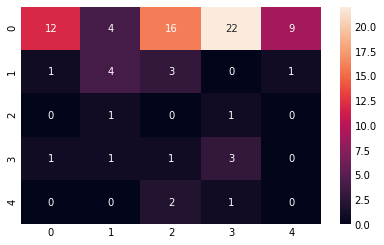

In [ ]:
#Heatmap visualised Grouped Confusion Matrix
sns.heatmap(confusion_matrix(y_testx, test_pred1), annot=True)

In [ ]:
#Building SVM model
from sklearn import svm
w2v_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

#Training
w2v_SVM.fit(w2v_Xtrain, y_trainx)

#Testing
y_predict = w2v_SVM.predict(w2v_Xtest)

#Checking Accuracy
accuracy_score(y_predict , y_testx)*100

75.90361445783132

In [ ]:
len(y_testx)

83

In [ ]:
63+9+2+6+3

83

In [ ]:
# confusion matrix
matrix = confusion_matrix(y_testx, y_predict)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[63  0  0  0  0]
 [ 9  0  0  0  0]
 [ 2  0  0  0  0]
 [ 6  0  0  0  0]
 [ 3  0  0  0  0]]


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_testx, y_predict, target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']))


Classification Report

              precision    recall  f1-score   support

     Level 1       0.76      1.00      0.86        63
     Level 2       0.00      0.00      0.00         9
     Level 3       0.00      0.00      0.00         2
     Level 4       0.00      0.00      0.00         6
     Level 5       0.00      0.00      0.00         3

    accuracy                           0.76        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.58      0.76      0.66        83



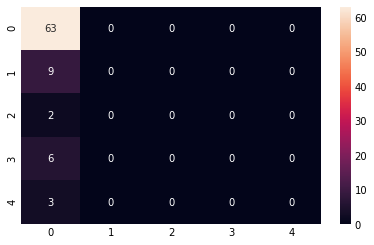

In [ ]:
#Heatmap visualised Grouped Confusion Matrix
sns.heatmap(confusion_matrix(y_testx, y_predict), annot=True)

**9.2 Neural Network Model with word2Vec Encoder**

In [ ]:
#Importing relevant Libraries
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

In [ ]:
#Defining Neural Network model
model = Sequential()
embedding_layer = Embedding(num_words,EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

model.add(embedding_layer)
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='sigmoid'))


In [ ]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
h1 = model.fit(X_train, y_train, epochs=40,validation_data=(x_val, y_val), verbose=2, shuffle=True)

Epoch 1/40
38/38 - 24s - loss: 0.5842 - accuracy: 0.2089 - val_loss: 0.5300 - val_accuracy: 0.0238
Epoch 2/40
38/38 - 0s - loss: 0.5178 - accuracy: 0.2500 - val_loss: 0.4972 - val_accuracy: 0.0952
Epoch 3/40
38/38 - 0s - loss: 0.4992 - accuracy: 0.2640 - val_loss: 0.4818 - val_accuracy: 0.0952
Epoch 4/40
38/38 - 0s - loss: 0.4862 - accuracy: 0.2944 - val_loss: 0.4670 - val_accuracy: 0.1190
Epoch 5/40
38/38 - 0s - loss: 0.4798 - accuracy: 0.2977 - val_loss: 0.4587 - val_accuracy: 0.1190
Epoch 6/40
38/38 - 0s - loss: 0.4737 - accuracy: 0.2952 - val_loss: 0.4535 - val_accuracy: 0.1190
Epoch 7/40
38/38 - 0s - loss: 0.4677 - accuracy: 0.3133 - val_loss: 0.4665 - val_accuracy: 0.1190
Epoch 8/40
38/38 - 0s - loss: 0.4630 - accuracy: 0.3363 - val_loss: 0.4420 - val_accuracy: 0.2381
Epoch 9/40
38/38 - 0s - loss: 0.4574 - accuracy: 0.3643 - val_loss: 0.4328 - val_accuracy: 0.4524
Epoch 10/40
38/38 - 0s - loss: 0.4525 - accuracy: 0.3635 - val_loss: 0.4271 - val_accuracy: 0.5238
Epoch 11/40
38/38 

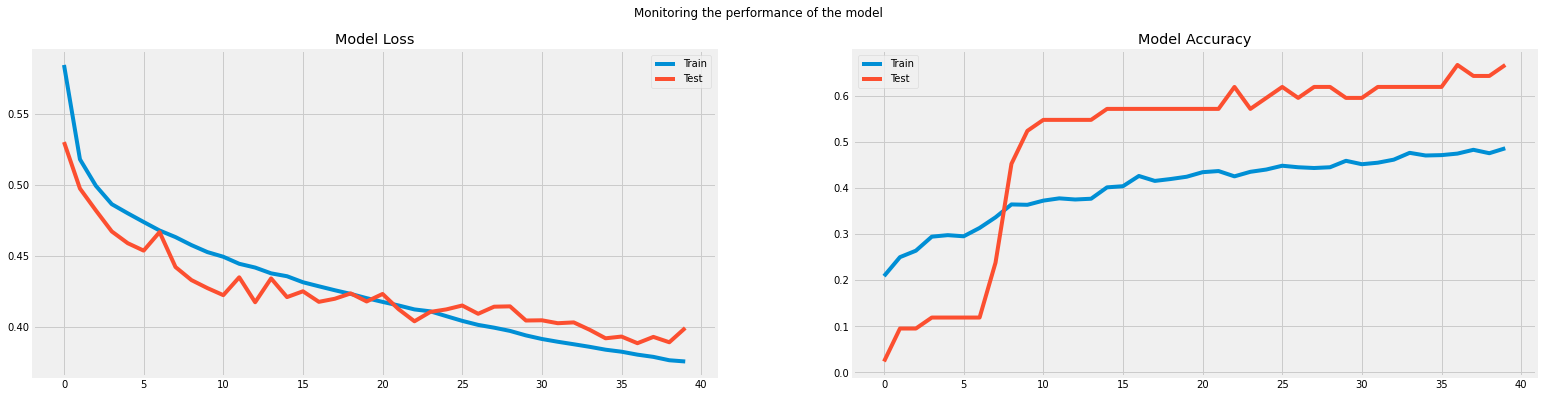

In [ ]:
#Model Evaluation
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 6))
f.suptitle('Monitoring the performance of the model')

loss = 'loss'
val_loss = 'val_loss'
accuracy = 'accuracy'
val_accuracy = 'val_accuracy'

ax1.plot(h1.history['loss'], label = 'Train')
ax1.plot(h1.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(h1.history[accuracy], label = 'Train')
ax2.plot(h1.history[val_accuracy], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 10ms/step - loss: 0.3853 - accuracy: 0.4737


[0.38534465432167053, 0.4736842215061188]

In [ ]:
#Preparing Classification Report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_proba(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

31/31 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.42      0.72      0.53        60
           1       0.31      0.19      0.23        48
           2       0.32      0.46      0.38        61
           3       0.00      0.00      0.00        69
           4       0.76      0.97      0.85        66

    accuracy                           0.47       304
   macro avg       0.36      0.47      0.40       304
weighted avg       0.36      0.47      0.40       304



In [ ]:
confusion_matrix(y_test_bool, y_pred_bool)

array([[43,  5, 11,  0,  1],
       [20,  9, 18,  0,  1],
       [18,  9, 28,  0,  6],
       [22,  6, 29,  0, 12],
       [ 0,  0,  2,  0, 64]])

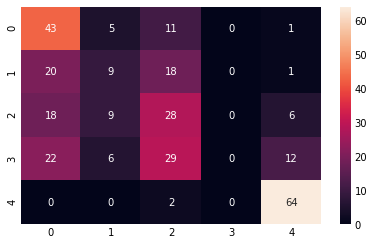

In [ ]:
#Heatmap visualised Grouped Confusion Matrix
sns.heatmap(confusion_matrix(y_test_bool, y_pred_bool), annot=True)

In [ ]:
report = classification_report(y_test_bool, y_pred_bool, output_dict=True)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=[0,1, 2, 3, 4]  )

array([[[184,  60],
        [ 17,  43]],

       [[236,  20],
        [ 39,   9]],

       [[183,  60],
        [ 33,  28]],

       [[235,   0],
        [ 69,   0]],

       [[218,  20],
        [  2,  64]]])

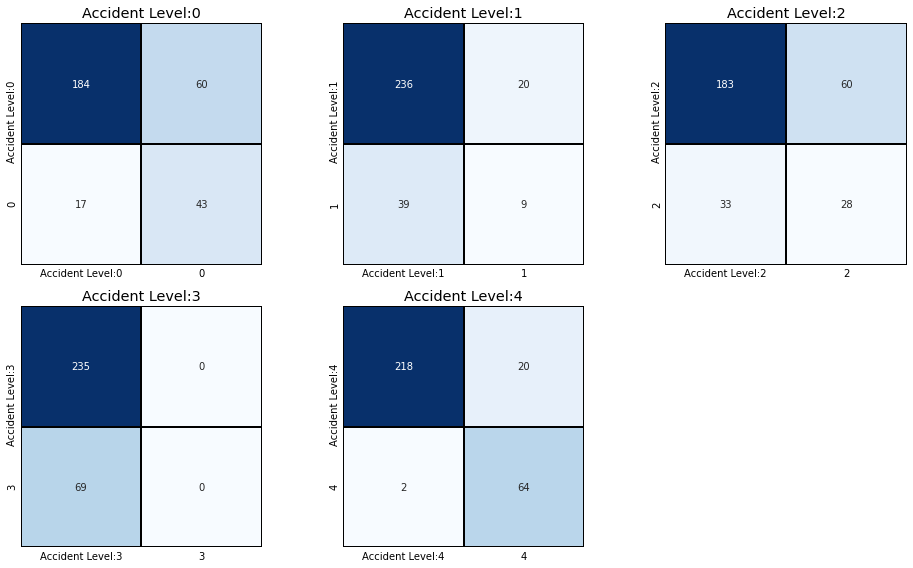

In [ ]:
import seaborn as sns
labels = [0,1,2,3,4]
confusion = multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=labels)

# Plot confusion matrix 
fig = plt.figure(figsize = (14, 8))
for i, (label, matrix) in enumerate(zip(labels, confusion)):
    plt.subplot(f'23{i+1}')
    labels = [f'Accident Level:{label}', label]
    sns.heatmap(matrix, annot = True, square = True, fmt = 'd', cbar = False, cmap = 'Blues', 
                xticklabels = labels, yticklabels = labels, linecolor = 'black', linewidth = 1)
    plt.title(labels[0])

plt.tight_layout()
plt.show()

**9.3.1 Simple LSTM Model with word2Vec Encoder**

In [ ]:
#Defining LSTM Model 
model = Sequential()
embedding_layer = Embedding(num_words,EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
h2 = model.fit(X_train, y_train, batch_size=128, epochs=50 , validation_data=(x_val, y_val), verbose=2, shuffle=True)

Epoch 1/50
10/10 - 42s - loss: 1.6080 - accuracy: 0.1998 - val_loss: 1.5787 - val_accuracy: 0.1905
Epoch 2/50
10/10 - 37s - loss: 1.5936 - accuracy: 0.2426 - val_loss: 1.5453 - val_accuracy: 0.4048
Epoch 3/50
10/10 - 36s - loss: 1.5416 - accuracy: 0.3232 - val_loss: 1.5534 - val_accuracy: 0.2857
Epoch 4/50
10/10 - 36s - loss: 1.4909 - accuracy: 0.3438 - val_loss: 1.3271 - val_accuracy: 0.6905
Epoch 5/50
10/10 - 36s - loss: 1.4347 - accuracy: 0.3586 - val_loss: 1.3811 - val_accuracy: 0.5000
Epoch 6/50
10/10 - 37s - loss: 1.3914 - accuracy: 0.3988 - val_loss: 1.3925 - val_accuracy: 0.4762
Epoch 7/50
10/10 - 37s - loss: 1.3585 - accuracy: 0.4120 - val_loss: 1.5238 - val_accuracy: 0.3810
Epoch 8/50
10/10 - 37s - loss: 1.3434 - accuracy: 0.4416 - val_loss: 1.4760 - val_accuracy: 0.4286
Epoch 9/50
10/10 - 37s - loss: 1.3244 - accuracy: 0.4457 - val_loss: 1.5661 - val_accuracy: 0.4048
Epoch 10/50
10/10 - 36s - loss: 1.3066 - accuracy: 0.4564 - val_loss: 1.5087 - val_accuracy: 0.4286
Epoch 11/

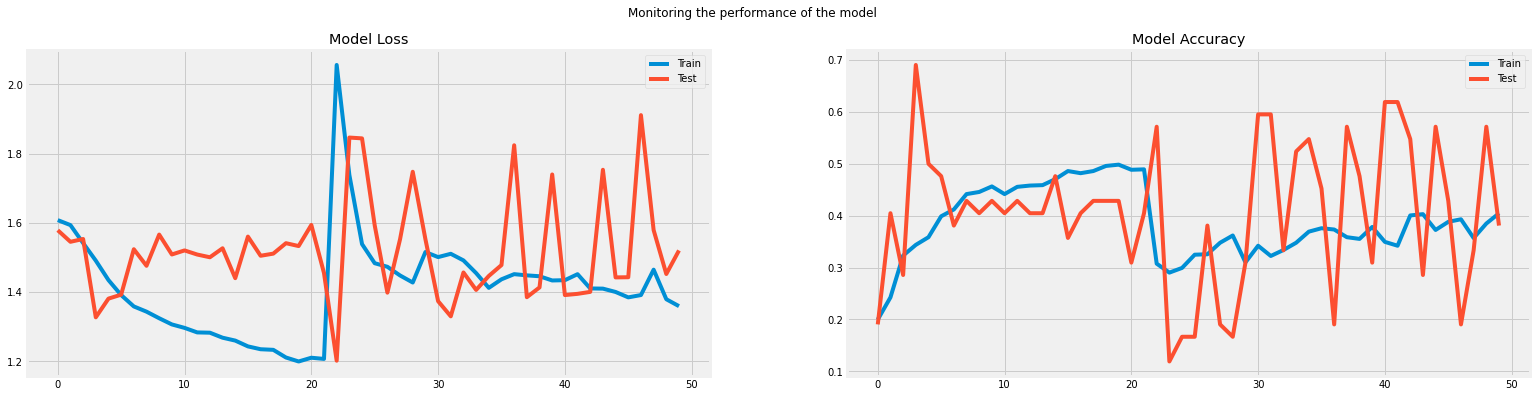

In [ ]:
#Model Evaluation
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 6))
f.suptitle('Monitoring the performance of the model')

loss = 'loss'
val_loss = 'val_loss'
accuracy = 'accuracy'
val_accuracy = 'val_accuracy'

ax1.plot(h2.history['loss'], label = 'Train')
ax1.plot(h2.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(h2.history[accuracy], label = 'Train')
ax2.plot(h2.history[val_accuracy], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 4s 300ms/step - loss: 1.3601 - accuracy: 0.4243


[1.3601154088974, 0.4243420958518982]

In [ ]:
#Preparing Classification Report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_proba(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

31/31 [==============================] - 9s 284ms/step
              precision    recall  f1-score   support

           0       0.52      0.38      0.44        60
           1       0.35      0.40      0.37        48
           2       0.35      0.43      0.38        61
           3       0.35      0.17      0.23        69
           4       0.51      0.74      0.60        66

    accuracy                           0.42       304
   macro avg       0.42      0.42      0.41       304
weighted avg       0.42      0.42      0.41       304



In [ ]:
confusion_matrix(y_test_bool, y_pred_bool)

array([[23, 16,  9,  6,  6],
       [ 8, 19, 15,  2,  4],
       [ 7, 10, 26,  7, 11],
       [ 6,  9, 16, 12, 26],
       [ 0,  1,  9,  7, 49]])

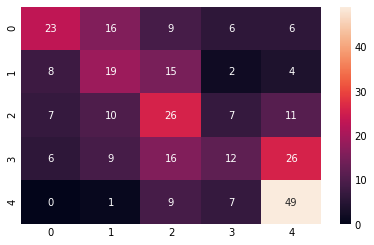

In [ ]:
#Heatmap visualised Grouped Confusion Matrix
sns.heatmap(confusion_matrix(y_test_bool, y_pred_bool), annot=True)

In [ ]:
report = classification_report(y_test_bool, y_pred_bool, output_dict=True)

In [ ]:
#Indivisual Label Analysis
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=[0,1, 2, 3, 4]  )

array([[[223,  21],
        [ 37,  23]],

       [[220,  36],
        [ 29,  19]],

       [[194,  49],
        [ 35,  26]],

       [[213,  22],
        [ 57,  12]],

       [[191,  47],
        [ 17,  49]]])

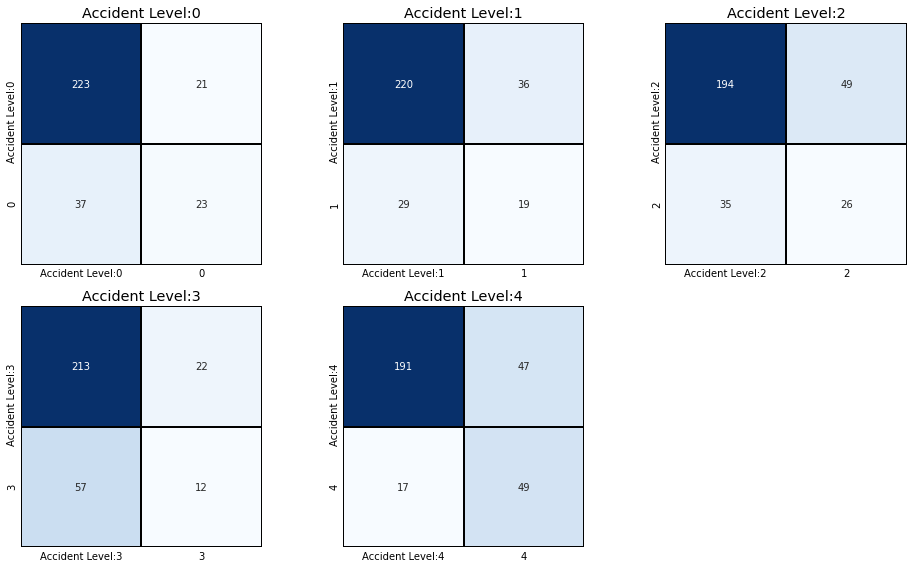

In [ ]:
import seaborn as sns
labels = [0,1,2,3,4]
confusion = multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=labels)

# Plot confusion matrix 
fig = plt.figure(figsize = (14, 8))
for i, (label, matrix) in enumerate(zip(labels, confusion)):
    plt.subplot(f'23{i+1}')
    labels = [f'Accident Level:{label}', label]
    sns.heatmap(matrix, annot = True, square = True, fmt = 'd', cbar = False, cmap = 'Blues', 
                xticklabels = labels, yticklabels = labels, linecolor = 'black', linewidth = 1)
    plt.title(labels[0])

plt.tight_layout()
plt.show()

**9.3.2  LSTM Layer Model with word2Vec Encoder**

In [ ]:
# Model building
model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
h = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(x_val, y_val), verbose=2, shuffle=True)

Epoch 1/100
10/10 - 40s - loss: 1.6087 - accuracy: 0.2056 - val_loss: 1.5786 - val_accuracy: 0.4524
Epoch 2/100
10/10 - 37s - loss: 1.5964 - accuracy: 0.2434 - val_loss: 1.5599 - val_accuracy: 0.4286
Epoch 3/100
10/10 - 36s - loss: 1.5530 - accuracy: 0.3380 - val_loss: 1.8159 - val_accuracy: 0.1429
Epoch 4/100
10/10 - 37s - loss: 1.5461 - accuracy: 0.3314 - val_loss: 1.4545 - val_accuracy: 0.4762
Epoch 5/100
10/10 - 37s - loss: 1.4598 - accuracy: 0.3660 - val_loss: 1.3883 - val_accuracy: 0.5238
Epoch 6/100
10/10 - 36s - loss: 1.3920 - accuracy: 0.4046 - val_loss: 1.4703 - val_accuracy: 0.4524
Epoch 7/100
10/10 - 36s - loss: 1.3665 - accuracy: 0.4161 - val_loss: 1.5344 - val_accuracy: 0.4286
Epoch 8/100
10/10 - 36s - loss: 1.3374 - accuracy: 0.4572 - val_loss: 1.4768 - val_accuracy: 0.4762
Epoch 9/100
10/10 - 36s - loss: 1.3167 - accuracy: 0.4391 - val_loss: 1.5587 - val_accuracy: 0.4286
Epoch 10/100
10/10 - 36s - loss: 1.3142 - accuracy: 0.4531 - val_loss: 1.4274 - val_accuracy: 0.4286

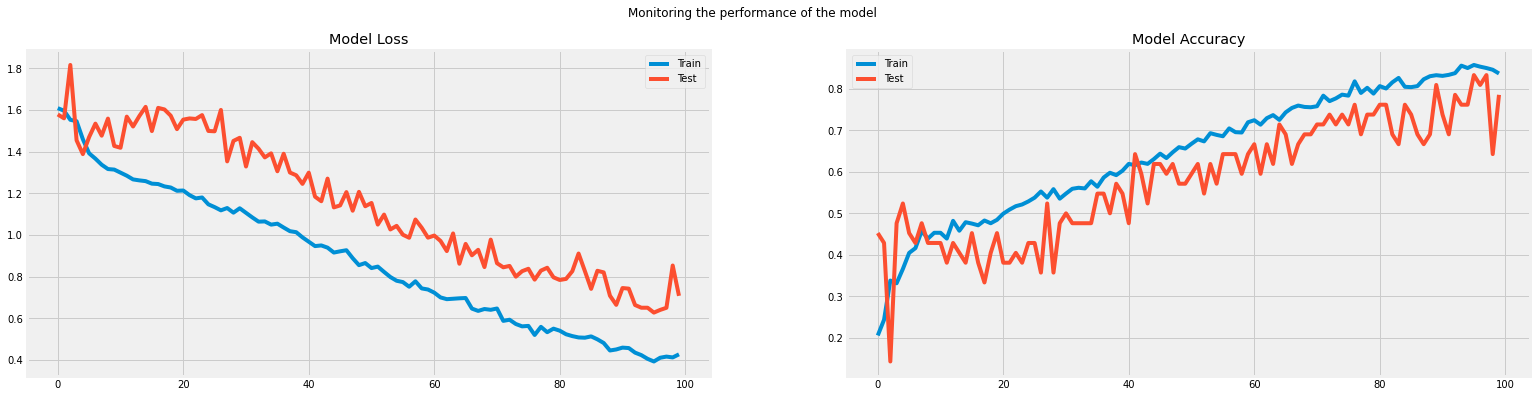

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 6))
f.suptitle('Monitoring the performance of the model')

loss = 'loss'
val_loss = 'val_loss'
accuracy = 'accuracy'
val_accuracy = 'val_accuracy'

ax1.plot(h.history['loss'], label = 'Train')
ax1.plot(h.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(h.history[accuracy], label = 'Train')
ax2.plot(h.history[val_accuracy], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [ ]:
print('Testing...')
score, acc = model.evaluate(x_val, y_val, batch_size=10)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

Testing...
5/5 [==============================] - 1s 295ms/step - loss: 0.7086 - accuracy: 0.7857
Test score: 0.708615779876709
Test accuracy: 0.7857142686843872
Accuracy: 78.57%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_proba(X_test, batch_size=128, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

3/3 [==============================] - 1s 316ms/step
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        60
           1       0.49      0.71      0.58        48
           2       0.65      0.66      0.65        61
           3       0.80      0.64      0.71        69
           4       0.93      0.95      0.94        66

    accuracy                           0.71       304
   macro avg       0.71      0.71      0.70       304
weighted avg       0.73      0.71      0.71       304



In [ ]:
confusion_matrix(y_test_bool, y_pred_bool)

array([[35, 14,  6,  5,  0],
       [ 6, 34,  5,  3,  0],
       [ 5, 13, 40,  2,  1],
       [ 4,  8,  9, 44,  4],
       [ 0,  0,  2,  1, 63]])

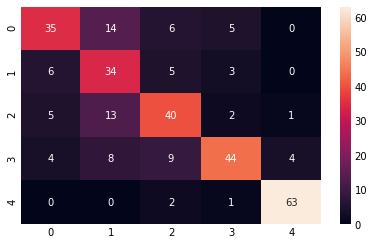

In [ ]:
sns.heatmap(confusion_matrix(y_test_bool, y_pred_bool), annot=True)

In [ ]:
report = classification_report(y_test_bool, y_pred_bool, output_dict=True)

In [ ]:

multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=[0,1, 2, 3, 4]  )

array([[[229,  15],
        [ 25,  35]],

       [[221,  35],
        [ 14,  34]],

       [[221,  22],
        [ 21,  40]],

       [[224,  11],
        [ 25,  44]],

       [[233,   5],
        [  3,  63]]])

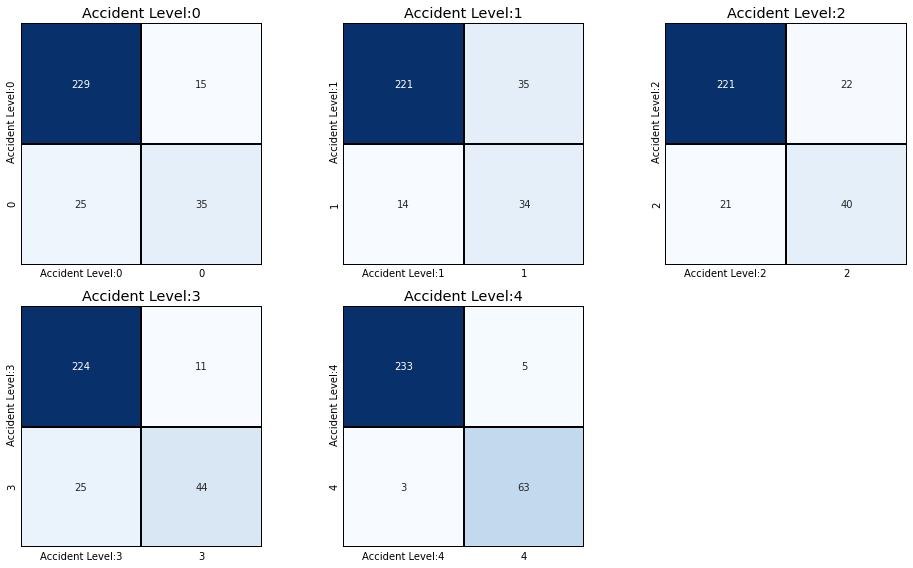

In [ ]:
import seaborn as sns
labels = [0,1,2,3,4]
confusion = multilabel_confusion_matrix(y_test_bool, y_pred_bool, labels=labels)

# Plot confusion matrix 
fig = plt.figure(figsize = (14, 8))
for i, (label, matrix) in enumerate(zip(labels, confusion)):
    plt.subplot(f'23{i+1}')
    labels = [f'Accident Level:{label}', label]
    sns.heatmap(matrix, annot = True, square = True, fmt = 'd', cbar = False, cmap = 'Blues', 
                xticklabels = labels, yticklabels = labels, linecolor = 'black', linewidth = 1)
    plt.title(labels[0])

plt.tight_layout()
plt.show()

---------------------------